In [2]:
pip install ../../

Processing /home/mehdi/Straph
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Created wheel for straph: filename=straph-0.3-py3-none-any.whl size=127044 sha256=840a83c4271776659f0e049906908eb30e0a3966e7d8a0c2438ef6f288ecd988
  Stored in directory: /tmp/pip-ephem-wheel-cache-ter9wi_m/wheels/b5/a9/15/900863b02cb736e4f08449e03d1d2d6ad447e06de70afc5fed
Successfully built straph
  Attempting uninstall: straph
    Found existing installation: straph 0.3
    Uninstalling straph-0.3:
      Successfully uninstalled straph-0.3
You should consider upgrading via the '/home/mehdi/sage_github/sage/bin/python3 -m pip install --upgrade pip' command.
Note: yo

In [1]:
#sigmasv_links.sg
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (25,20)
import straph as sg
import straph.betweenness as bt

In [2]:
T = [0,10]
nb_node = 80
prob = 0.1
S = sg.erdos_renyi_discrete(T, nb_node,prob)
S.describe()

Nb of Nodes :  80
Nb of segmented nodes :  80.0
Nb of links :  4357
Nb of segmented links :  7009.0
Nb of event times :  11


In [3]:
events, events_reverse = bt.events_dic(S)

In [4]:
link_ind = bt.link_index(S)
neighbors, neighbors_inv = bt.neighbors_direct(S)
unt = bt.until(S, events, events_reverse)

In [86]:
node = 0

In [87]:
import operator
import networkx as nx
b = operator.lt
walk_type = "passive"
fun =  mw.Metawalk.co_sfp

In [88]:
pre, cur_best, opt_walk = bt.dijkstra_directed_dis_gen(S, node, events, events_reverse, neighbors, link_ind, neighbors_inv, unt, b, fun, walk_type)


In [89]:
pre2, cur_best2, opt_walk2 = bt.ford_bellman_directed_gen_dis(S, node, events, events_reverse, neighbors, link_ind, neighbors_inv, unt, b, fun, walk_type)


In [71]:
pre[:10]

[{0: {(-inf, -inf)},
  1: {(3, 1), (20, 1)},
  2: {(28, 2)},
  3: {(16, 3)},
  4: {(1, 4), (3, 4), (23, 4), (25, 4)},
  5: {(26, 5), (39, 5)},
  6: {(9, 6)},
  7: {(35, 7)},
  8: {(4, 8), (6, 8), (19, 8), (32, 8)},
  9: {(16, 9)},
  10: {(9, 10)}},
 {0: {(18, 0), (29, 0)},
  1: {(12, 1)},
  2: {(3, 2), (8, 2), (22, 2)},
  3: {(32, 3)},
  4: {(15, 4)},
  5: {(10, 5)},
  6: {(0, 0)},
  7: {(9, 7), (39, 7)},
  8: {(25, 8)},
  9: {(13, 9)},
  10: {(13, 10), (14, 10), (23, 10)}},
 {0: {(31, 0), (39, 0)},
  1: {(30, 1), (36, 1)},
  2: {(15, 2)},
  3: {(16, 3)},
  4: {(36, 4)},
  5: {(3, 5), (4, 5)},
  6: {(25, 6)},
  7: {(0, 0)},
  8: {(21, 8)},
  9: {(17, 9)},
  10: {(0, 0)}},
 {0: {(4, 0), (36, 0)},
  1: {(0, 0)},
  2: {(31, 2)},
  3: {(32, 3)},
  4: {(16, 4), (21, 4), (35, 4)},
  5: {(13, 5)},
  6: {(12, 6)},
  7: {(8, 7), (11, 7), (26, 7)},
  8: {(18, 8)},
  9: {(12, 9)},
  10: {(26, 10)}},
 {0: {(0, 0)},
  1: {(37, 1)},
  2: {(18, 2)},
  3: {(18, 3)},
  4: {(21, 4), (36, 4)},
  5: {(14,

In [90]:
for i in range(0,len(S.nodes)):
    for t in cur_best[i].keys():
        if cur_best[i][t] != cur_best2[i][t]:
            print("gros probleme",cur_best[i][t] , cur_best2[i][t])

In [91]:
for i in range(0,len(S.nodes)):
    for t in cur_best2[i].keys():
        if cur_best2[i][t] != cur_best[i][t]:
            print("gros probleme",cur_best2[i][t] , cur_best[i][t])

In [92]:
for i in range(0,len(S.nodes)):
    for t in pre[i].keys():
        if pre[i][t] != pre2[i][t]:
            print("gros probleme",pre[i][t] , pre2[i][t])

In [93]:
for i in range(0,len(S.nodes)):
    for t in pre2[i].keys():
        if pre2[i][t] != pre[i][t]:
            print("gros probleme",pre2[i][t] , pre[i][t])

In [73]:
G = bt.predecessor_graph_dis_gen(S, pre,node)
GG = bt.graph_to_ordered(G, events, events_reverse)


In [72]:
cur_best2[2]

{0.0: inf, 1.0: inf, 2.0: 7.0, 2.5: inf, 3.0: 12.0, 4.0: inf, 6.0: 12.0}

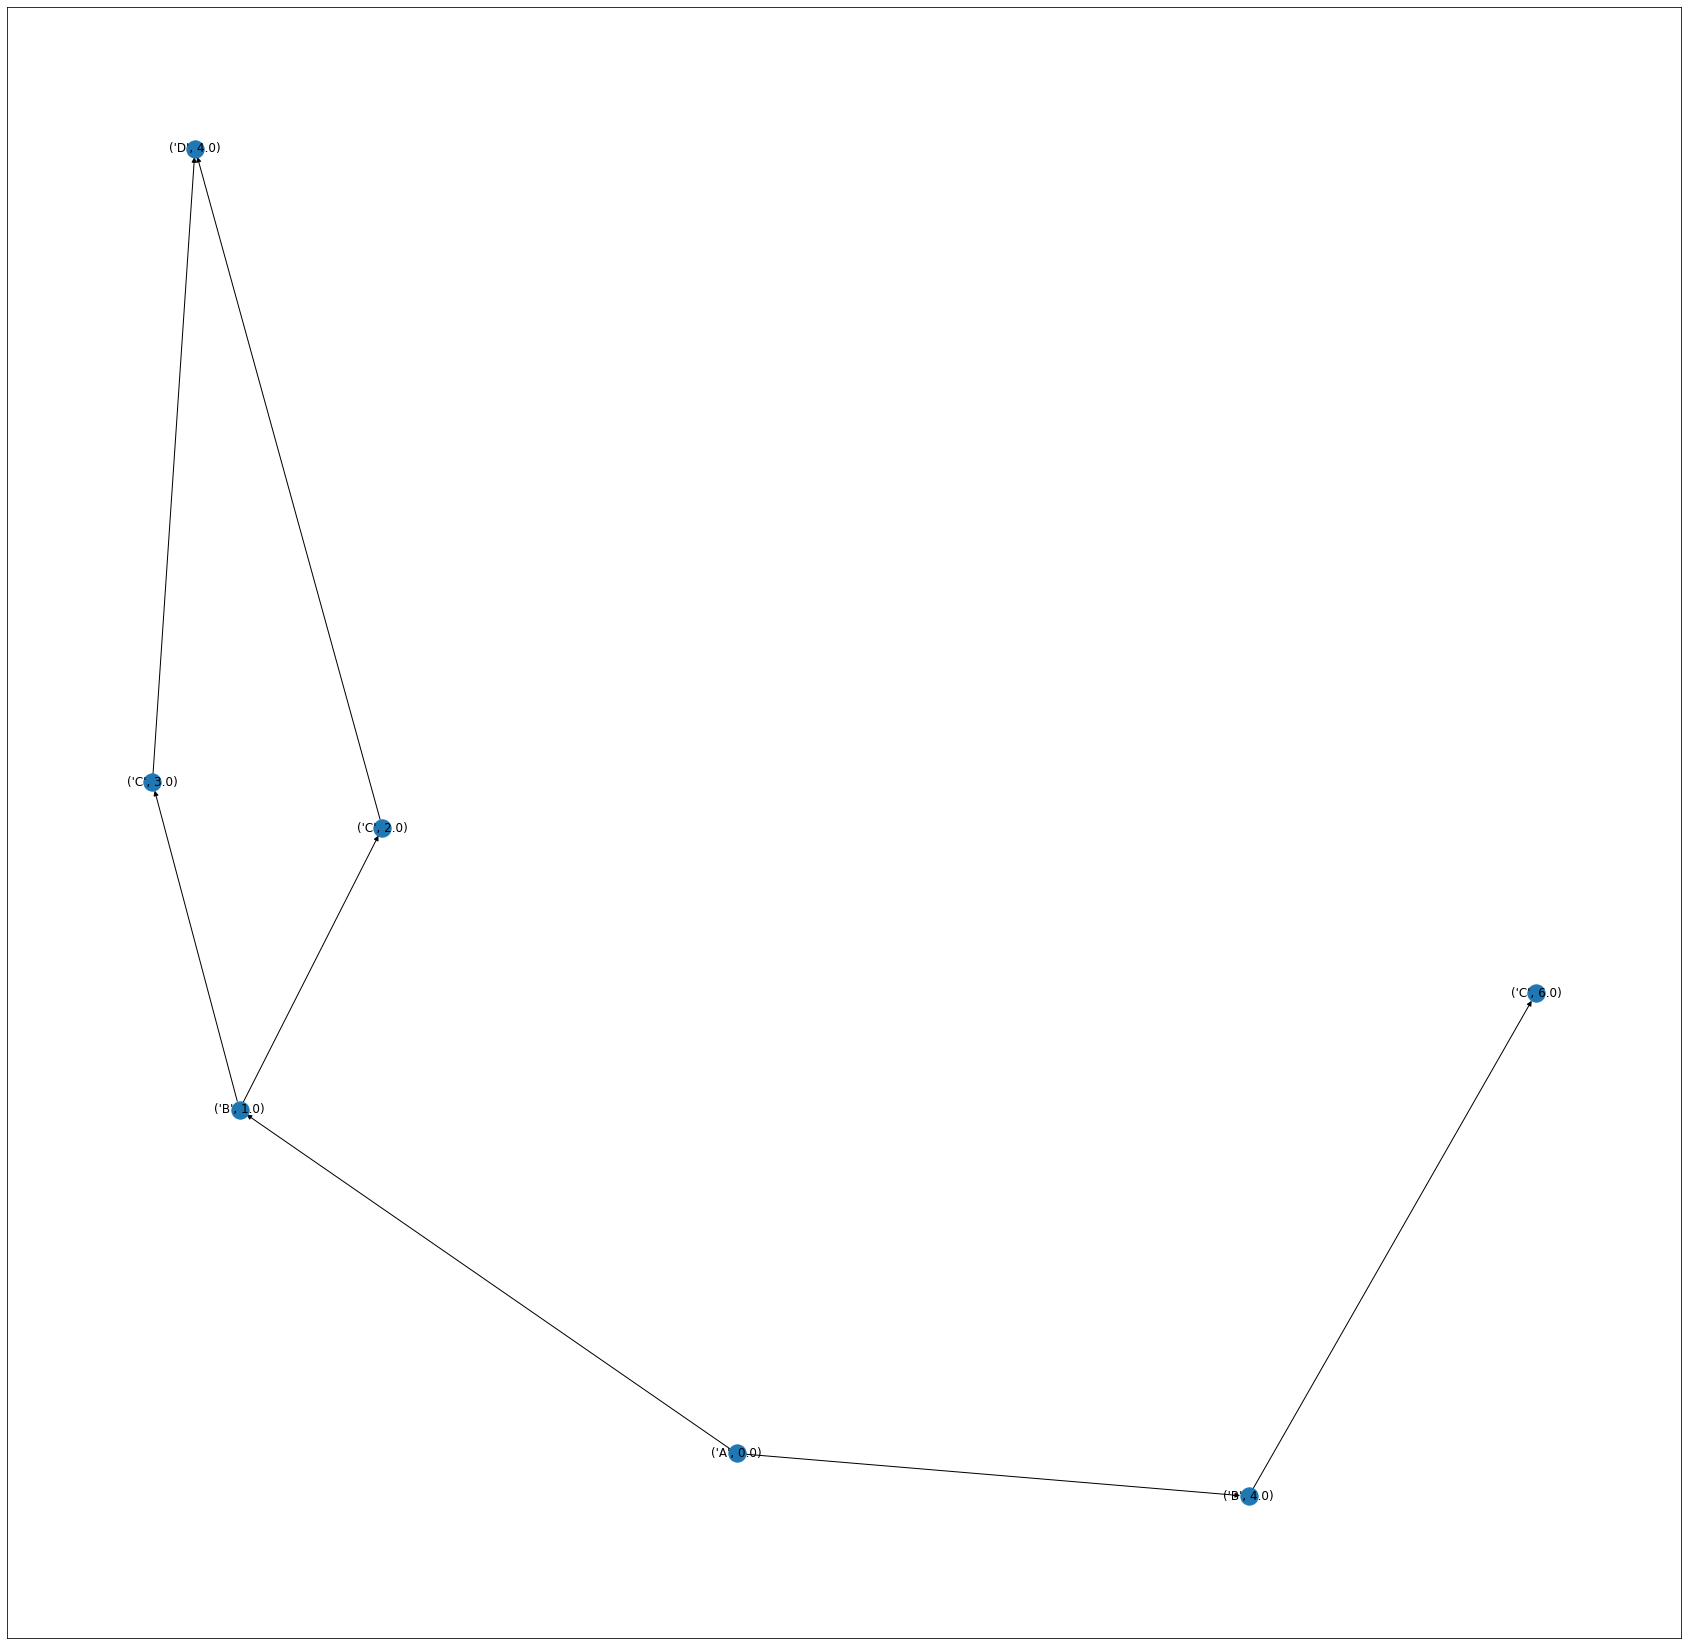

In [74]:
import networkx as nx
GD = G.graph
ren = dict()
for e in GD.nodes:
    ren[e] = (S.node_to_label[e[0]],e[1])
#print(ren)
GN =  nx.relabel_nodes(GD, ren, copy=True)
fig, ax = plt.subplots(figsize=(30,30))
nx.draw_networkx(GN,arrows=True,width = 1,ax = ax)

In [75]:
inf_scc = set()
scc = nx.kosaraju_strongly_connected_components(G.graph)
for s in scc:
    if len(s) > 1:
        inf_scc.add(s)

In [76]:
H = nx.condensation(G.graph)
res = set()
for s in inf_scc:
    for e in nx.bfs_edges(H, s):
        inf_scc.add(e)

In [77]:
temp_inf = set()
for s in inf_scc:
    for v in s:
        temp_inf.add(v)
for v in temp_inf:
    G.remove_node(v)

In [78]:
temp_inf

set()

In [79]:
clos_inf = bt.infinite_closure(s, G, events, events_reverse, temp_inf, opt_walk, cur_best, mw.Metawalk.co_short, len(S.nodes))

In [80]:
node_inf = temp_inf.union(clos_inf)

In [81]:
sigma = bt.volume_metapaths_at_dis_gen(G, node, S.alpha)
if walk_type == "active":
    sigma_r = bt.optimal_with_resting_dis_gen(S, node, events, G, sigma, cur_best, unt, node_inf, opt_walk, mw.Metawalk.co_short, len(S.nodes))
else:
    sigma_r = dict()
    for e in sigma.keys():
        sigma_r[e] = sigma[e]

In [82]:
sigma

{(0, 0.0): 1,
 (1, 4.0): 1,
 (2, 6.0): 1,
 (1, 1.0): 1,
 (2, 2.0): 1,
 (2, 3.0): 1,
 (3, 4.0): 2}

In [83]:
sigma_r

{(0, 0.0): 1,
 (1, 4.0): 1,
 (2, 6.0): 1,
 (1, 1.0): 1,
 (2, 2.0): 1,
 (2, 3.0): 1,
 (3, 4.0): 2}

In [84]:
min_values = { i:min(cur_best[i].values())   for i in S.nodes}

In [85]:
min_values

{0: 0.0, 1: 1.0, 2: 7.0, 3: 18.0, 4: inf}

In [86]:
sigma_dic = dict()
for (v,t) in sigma:
    if v not in sigma_dic:
        sigma_dic[v] = dict()
    sigma_dic[v][t] = sigma[(v,t)]

In [87]:
sigma_dic

{0: {0.0: 1}, 1: {4.0: 1, 1.0: 1}, 2: {6.0: 1, 2.0: 1, 3.0: 1}, 3: {4.0: 2}}

In [88]:
sigma_tot = { i : sum( sigma_dic[i][t] for t in sigma_dic[i].keys() if i in min_values and cur_best[i][t] == min_values[i]) for i in S.nodes if i != node and i in sigma_dic}

In [89]:
sigma_tot

{1: 2, 2: 1, 3: 2}

In [90]:
deltasvvt = bt.dictionary_svvt_dis_gen(G, node, sigma_r,min_values, cur_best, sigma_tot)

In [91]:
deltasvvt

{(0, 0.0): 0.0,
 (1, 1.0): 0.5,
 (1, 4.0): 0.5,
 (2, 2.0): 1.0,
 (2, 3.0): 0.0,
 (2, 6.0): 0.0,
 (3, 4.0): 1.0}

In [92]:
preced = bt.preced_node(S, G,events,events_reverse)

In [93]:
preced[0]

{0.0: 0.0, 1.0: 0.0, 2.0: 0.0, 2.5: 0.0, 3.0: 0.0, 4.0: 0.0, 6.0: 0.0}

In [94]:
contribution = bt.general_contribution_from_node_dis_gen(S, G, node, GG, sigma_r, deltasvvt, events, events_reverse, pre, unt, preced, walk_type)

In [95]:
contribution

{2: {6.0: 0.0, 3.0: 0.5, 2.0: 1.5, 0.0: 0.0, 1.0: 0.0, 2.5: 0.0, 4.0: 0.0},
 1: {4.0: 0.5, 1.0: 2.5, 0.0: 0.0, 2.0: 0.0, 2.5: 0.0, 3.0: 0.0, 6.0: 0.0},
 3: {4.0: 1.0, 0.0: 0.0, 1.0: 0.0, 2.0: 0.0, 2.5: 0.0, 3.0: 0.0, 6.0: 0.0},
 0: {0.0: 3.0, 1.0: 0.0, 2.0: 0.0, 2.5: 0.0, 3.0: 0.0, 4.0: 0.0, 6.0: 0.0},
 4: {0.0: 0.0, 1.0: 0.0, 2.0: 0.0, 2.5: 0.0, 3.0: 0.0, 4.0: 0.0, 6.0: 0.0}}

In [ ]:
{2: {6.0: 0.0, 3.0: 0.5, 2.0: 1.5, 0.0: 0.0, 1.0: 0.0, 2.5: 0.0, 4.0: 0.0},
 1: {4.0: 0.5, 1.0: 2.5, 0.0: 0.0, 2.0: 0.0, 2.5: 0.0, 3.0: 0.0, 6.0: 0.0},
 3: {4.0: 1.0, 0.0: 0.0, 1.0: 0.0, 2.0: 0.0, 2.5: 0.0, 3.0: 0.0, 6.0: 0.0},
 0: {0.0: 3.0, 1.0: 0.0, 2.0: 0.0, 2.5: 0.0, 3.0: 0.0, 4.0: 0.0, 6.0: 0.0},
 4: {0.0: 0.0, 1.0: 0.0, 2.0: 0.0, 2.5: 0.0, 3.0: 0.0, 4.0: 0.0, 6.0: 0.0}}